In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/karakaggle/kaggle-cat-vs-dog-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rhishikeshtayade
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/karakaggle/kaggle-cat-vs-dog-dataset


100%|██████████| 787M/787M [00:00<00:00, 1.33GB/s]


In [ ]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf

data_dir = "/content/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages"

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join(data_dir, folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            os.remove(fpath)

print(f"Deleted {num_skipped} images.")

Deleted 1580 images.


In [ ]:
img_height = 128
img_width = 128
color_channels = 3
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

valid_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print(f"Class names: {class_names}")

Found 23379 files belonging to 2 classes.
Using 18704 files for training.
Found 23379 files belonging to 2 classes.
Using 4675 files for validation.
Class names: ['Cat', 'Dog']


In [ ]:
for image_batch, label_batch in train_ds.take(1):
    print(f"Image Batch Shape: {image_batch.shape}")
    print(f"Label Batch Shape: {label_batch.shape}")

Image Batch Shape: (32, 128, 128, 3)
Label Batch Shape: (32, 1)


In [ ]:
from tensorflow.keras import layers

def cat_vs_dog_classification_model(input_shape=(img_width, img_height, color_channels), num_classes=1):
    model = tf.keras.models.Sequential()

    model.add(layers.Rescaling(1./255, input_shape=input_shape))

    # BLOCK 1
    model.add(layers.Conv2D(32, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(32, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(strides=(2,2), pool_size=(2,2)))

    # BLOCK 2
    model.add(layers.Conv2D(64, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(64, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(strides=(2,2), pool_size=(2,2)))


    # BLOCK 3
    model.add(layers.Conv2D(128, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(128, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(strides=(2,2), pool_size=(2,2)))

    # BLOCK 4
    model.add(layers.Conv2D(256, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(256, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(256, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(strides=2, pool_size=(2,2)))

    # Fully connected layers
    model.add(layers.Flatten())

    model.add(layers.Dense(4096))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(128))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(num_classes, activation='sigmoid'))

    return model

model = cat_vs_dog_classification_model()

model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             

 Total params: 69,421,601 (264.82 MB)

 Trainable params: 69,410,721 (264.78 MB)

 Non-trainable params: 10,880 (42.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True,
    verbose=1,
    mode='min'
)

checkpoint = ModelCheckpoint(
    "cat_dog_model.weights.h5",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    verbose=0
)

reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=5,
    verbose=0,
    min_lr=1e-6
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=60,
    callbacks=[early_stopping, checkpoint, reduce_lr_callback],
    verbose=1
)

Epoch 1/60
585/585 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.6445 - loss: 0.6647 - val_accuracy: 0.5874 - val_loss: 1.0012 - learning_rate: 0.0010
Epoch 2/60
585/585 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7539 - loss: 0.5020 - val_accuracy: 0.8092 - val_loss: 0.4200 - learning_rate: 0.0010
Epoch 3/60
585/585 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.8244 - loss: 0.3877 - val_accuracy: 0.8379 - val_loss: 0.3578 - learning_rate: 0.0010
Epoch 4/60
585/585 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8744 - loss: 0.3004 - val_accuracy: 0.8858 - val_loss: 0.2669 - learning_rate: 0.0010
Epoch 5/60
585/585 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9086 - loss: 0.2274 - val_accuracy: 0.8747 - val_loss: 0.2734 - learning_rate: 0.0010
Epoch 6/60
585/585 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9196 - loss: 0.1948 - val_accuracy: 0.8064 - val_loss: 0.4598 - learning_rate: 0.0010
Epoch 7/60
585/585 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9328 - l

In [ ]:
val_loss, val_acc = model.evaluate(valid_ds)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9449 - loss: 0.1832
Validation Loss: 0.17304833233356476
Validation Accuracy: 0.9486631155014038


In [ ]:
from google.colab import files

files.download("/content/cat_dog_model.weights.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

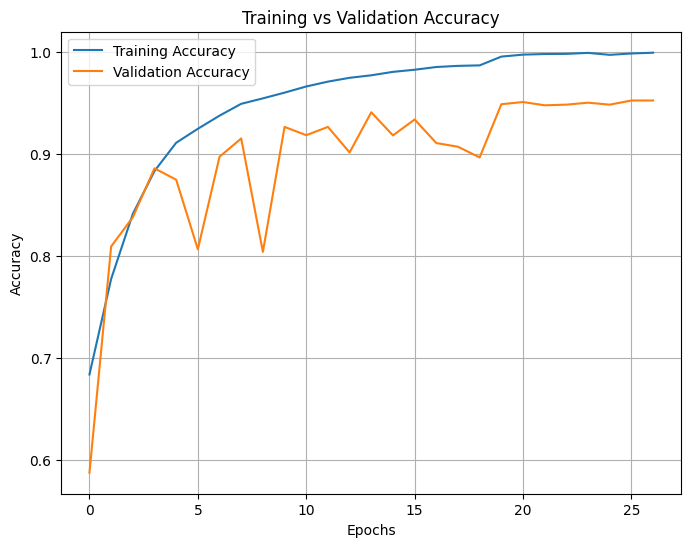

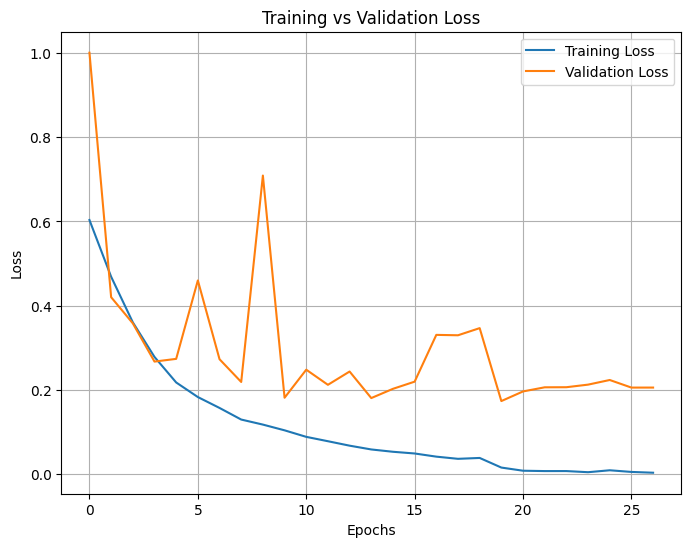

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()